# 1) Eliminación de stopwords

In [1]:
# Instalación de la libreria que utilizaremos
%pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [19]:
import spacy
import spacy.cli

spacy.cli.download("es_core_news_md")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

nlp = spacy.load('es_core_news_md')


# Descargar los  recursos que vamos a necesitar
nltk.download('punkt')
nltk.download('stopwords')

# Función para procesar texto y eliminar stopwords
def eliminar_stopwords_spacy(texto):
    doc = nlp(texto)
    palabras_filtradas = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(palabras_filtradas)

def eliminar_stopwords(texto, idioma='spanish'):
    stop_words = set(stopwords.words(idioma))
    palabras = word_tokenize(texto)
    palabras_filtradas = [palabra for palabra in palabras if palabra.lower() not in stop_words]
    return ' '.join(palabras_filtradas)

# Leer ambos archivos
with open("primer_tiempo.txt", "r", encoding="utf-8") as file1, open("segundo_tiempo.txt", "r", encoding="utf-8") as file2:
    narracion_primer_tiempo = file1.read()
    narracion_segundo_tiempo = file2.read()

# Procesar los textos para eliminar stopwords
narracion_primer_tiempo_filtrada = eliminar_stopwords_spacy(narracion_primer_tiempo)
narracion_segundo_tiempo_filtrada = eliminar_stopwords_spacy(narracion_segundo_tiempo)

# Imprimir o guardar los resultados
print("Narración Primer Tiempo (sin stopwords):")
print(narracion_primer_tiempo_filtrada)
print("\nNarración Segundo Tiempo (sin stopwords):")
print(narracion_segundo_tiempo_filtrada)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lotus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lotus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Narración Primer Tiempo (sin stopwords):
perfecto señoras señores acá partido arranca arranca partido señores señores juego juega equipo antigua Campeonato ventaja ventaja 2 0 equipo acostumbrado campeón buscará llegar sexta luna equipo semáforo Camposeco Moreira Moreira pelota mete González Escuadrón deportivo pasión deportes sigan dejando comentario sigan dejando siga participando estaremos leyendo saluditos Cristian José Saluditos conectados YouTube gracias gracias reportarse pelota pertenece equipo antigua Guatemala tiro libre tiro libre tiro libre tiro libre peligroso pertenece 4 Xelajú Mario Camposeco equipo antigua Guatemala partido gracias gracias terminar antigua viene remate remate llegar Arquero cortaron saca saca equipo Mario Camposeco llega Arquero pelota iba pelota saqué arco José Calderón pelotita salir jugando fondo equipo Xelajú Mario Camposeco Arquero oficialmente espectacular ambiente maravilloso Mario Camposeco vendrá cobrar saque Colonia cobró Arquero súper chivo s

# 2) Creacion de un diccionario de datos con palabras que nos interesan que analice la IA en el partido

In [2]:
from collections import defaultdict

# Lista de palabras para buscar en las narraciones
palabras_clave = ['gol', 'falta', 'tarjeta', 'remate', 'pelota', 'saque', 'arquero', 'equipo', 'penal']

# Función para contar las palabras clave en el texto
def contar_palabras_clave(texto, palabras_clave):
    # Crear un diccionario para almacenar las ocurrencias de cada palabra clave
    conteo_palabras = defaultdict(int)
    palabras = word_tokenize(texto)

    # Contar las palabras clave
    for palabra in palabras:
        if palabra.lower() in palabras_clave:
            conteo_palabras[palabra.lower()] += 1

    return dict(conteo_palabras)

# Contar palabras clave en la narración del primer y segundo tiempo
conteo_primer_tiempo = contar_palabras_clave(narracion_primer_tiempo_filtrada, palabras_clave)
conteo_segundo_tiempo = contar_palabras_clave(narracion_segundo_tiempo_filtrada, palabras_clave)

# Mostrar los resultados
print("Conteo de palabras clave en el Primer Tiempo:")
print(conteo_primer_tiempo)

print("\nConteo de palabras clave en el Segundo Tiempo:")
print(conteo_segundo_tiempo)


Conteo de palabras clave en el Primer Tiempo:
{'equipo': 105, 'pelota': 77, 'remate': 8, 'arquero': 22, 'saque': 12, 'falta': 21, 'tarjeta': 4, 'gol': 6}

Conteo de palabras clave en el Segundo Tiempo:
{'arquero': 16, 'pelota': 64, 'equipo': 66, 'saque': 32, 'gol': 118, 'remate': 12, 'falta': 19, 'tarjeta': 7, 'penal': 1}


# 3. Deteccion de Eventos Clave

In [3]:
import re

# Lista de palabras o frases que representan eventos clave
eventos_clave = [' gol ', 'golazo', 'falta', 'tarjeta', 'remate', 'pelota', 'saque', 'arquero', 'equipo', 'penal']

# Función para detectar eventos clave en el texto y extraer el contexto
def detectar_eventos_clave(texto, eventos_clave, contexto=30):
    # Crear un diccionario para almacenar los eventos y su contexto
    eventos_encontrados = []

    # Recorrer el texto y buscar cada palabra clave
    for evento in eventos_clave:
        # Usar expresiones regulares para encontrar la palabra clave
        for match in re.finditer(evento, texto, re.IGNORECASE):
            # Extraer una porción del texto antes y después del evento para dar contexto
            inicio = max(0, match.start() - contexto)  # Máximo entre 0 y la posición anterior al evento
            fin = min(len(texto), match.end() + contexto)  # Mínimo entre la longitud del texto y la posición posterior al evento
            eventos_encontrados.append({
                'evento': match.group(),
                'contexto': texto[inicio:fin]
            })

    return eventos_encontrados

# Unir las narraciones del primer y segundo tiempo
narracion_completa = narracion_primer_tiempo_filtrada + " " + narracion_segundo_tiempo_filtrada

# Detectar los eventos clave en la narración completa
eventos_detectados = detectar_eventos_clave(narracion_completa, eventos_clave)

# Mostrar los eventos clave encontrados con su contexto
for evento in eventos_detectados:
    print(f"Evento: {evento['evento']}")
    print(f"Contexto: {evento['contexto']}")
    print('-' * 50)


Evento:  gol 
Contexto: oras señores ganando Camposeco gol cero resultado acerca saludos 
--------------------------------------------------
Evento:  gol 
Contexto: res estuvieron cerca encontrar gol empate 41 minutos partido apar
--------------------------------------------------
Evento:  gol 
Contexto: tos partido apareció pan balón gol centro espectacular Cristian C
--------------------------------------------------
Evento:  gol 
Contexto: tmas Mariela León Sergio rojas gol campeón perfecto Francisco Ram
--------------------------------------------------
Evento:  gol 
Contexto: al totalmente atacando antigua gol Cristobal anotar contragolpe p
--------------------------------------------------
Evento:  gol 
Contexto:  Saludos Fernando Juárez llega gol Vázquez Vázquez chicos visuali
--------------------------------------------------
Evento:  gol 
Contexto: hivos saque puerta bajó buscar gol empate 45 minutos 44 jugó empa
--------------------------------------------------
Evento:  gol 

# 4) Visualización de Frecuencia de palabras

In [4]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


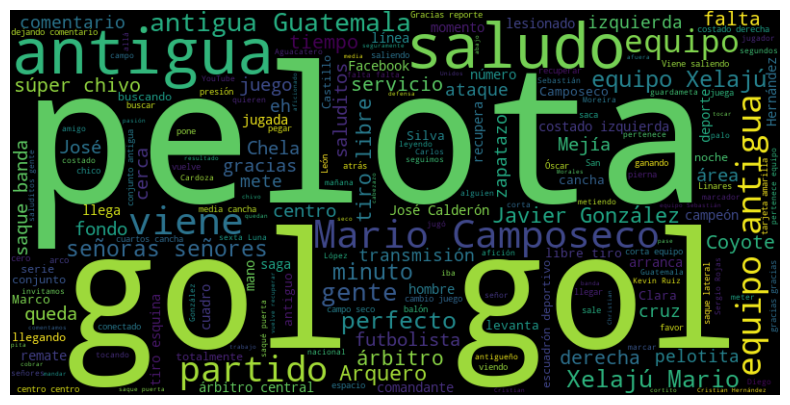

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# mostrar la nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(narracion_completa)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# 4. Análisis de Bigramas y Trigramas

In [7]:
from nltk import FreqDist
from nltk.util import bigrams

# Tokenizar y calcular los bigramas
tokens = word_tokenize(narracion_completa)
bigramas = list(bigrams(tokens))

# Contar frecuencia de bigramas
fdist_bigrams = FreqDist(bigramas)
print(fdist_bigrams.most_common(10))  # Mostrar los 10 bigramas más comunes


[(('gol', 'gol'), 102), (('Mario', 'Camposeco'), 80), (('equipo', 'antigua'), 60), (('antigua', 'Guatemala'), 52), (('Xelajú', 'Mario'), 42), (('equipo', 'Xelajú'), 37), (('señoras', 'señores'), 34), (('Javier', 'González'), 32), (('tiro', 'libre'), 30), (('saque', 'banda'), 21)]


# Análisis de Sentimientos del Primer y Segundo Tiempo

In [8]:
from textblob import TextBlob

# Función para analizar sentimientos
def analizar_sentimientos(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity  # Devuelve un valor entre -1 (negativo) y 1 (positivo)

# Análisis de sentimientos en las narraciones
sentimiento_primer_tiempo = analizar_sentimientos(narracion_primer_tiempo_filtrada)
sentimiento_segundo_tiempo = analizar_sentimientos(narracion_segundo_tiempo_filtrada)

print(f"Sentimiento del Primer Tiempo: {sentimiento_primer_tiempo}")
print(f"Sentimiento del Segundo Tiempo: {sentimiento_segundo_tiempo}")


Sentimiento del Primer Tiempo: 0.09411764705882353
Sentimiento del Segundo Tiempo: 0.07587412587412588


In [9]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Descargar stopwords en español de nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtener la lista de stopwords en español
stop_words_es = stopwords.words('spanish')

# Crear un vectorizador para las palabras
# Ajustar max_df y min_df para que funcionen correctamente con dos documentos
vectorizer = CountVectorizer(max_df=0.85, min_df=1, stop_words=stop_words_es)

# Transformar las narraciones en una matriz de conteo
X = vectorizer.fit_transform([narracion_primer_tiempo_filtrada, narracion_segundo_tiempo_filtrada])

# Aplicar LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Mostrar los temas
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])




Topic 0:
['ramírez', 'empatar', 'antonio', 'quedan', 'antiguas', 'morales', 'piernas', 'ay', 'meter', 'palo']
Topic 1:
['máximo', 'comentando', 'comentan', 'comarca', 'nelson', 'nerviosismo', 'nicole', 'nicolás', 'oposición', 'éxitos']
Topic 2:
['jugar', 'sacó', 'velásquez', 'terminó', 'espacios', 'cardoza', 'rojas', 'sergio', 'jonathan', 'vicente']
Topic 3:
['máximo', 'comentando', 'comentan', 'comarca', 'nelson', 'nerviosismo', 'nicole', 'nicolás', 'oposición', 'éxitos']
Topic 4:
['máximo', 'comentando', 'comentan', 'comarca', 'nelson', 'nerviosismo', 'nicole', 'nicolás', 'oposición', 'éxitos']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lotus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import re
from collections import defaultdict

# Definir las categorías de eventos clave
eventos_clasificados = {
    'gol': [' gol ', 'golazo', 'anota', 'marcaron'],
    'falta': ['falta', 'infracción', 'tarjeta', 'penal'],
    'ataque': ['remate', 'tiro', 'disparo', 'pelota'],
    'portero': ['arquero', 'portero', 'atajada','guardameta'],
    'saque': ['saque', 'córner', 'corner', 'tiro de esquina'],
}

# Función para detectar y clasificar eventos clave
def clasificar_eventos_clave(texto, eventos_clasificados, contexto=30):
    # Diccionario para almacenar los eventos encontrados, clasificados por categoría
    eventos_detectados = defaultdict(list)

    # Iterar sobre cada categoría de eventos
    for categoria, palabras_clave in eventos_clasificados.items():
        # Iterar sobre cada palabra clave de la categoría
        for palabra_clave in palabras_clave:
            # Usar expresiones regulares para buscar la palabra clave en el texto
            for match in re.finditer(palabra_clave, texto, re.IGNORECASE):
                # Extraer el contexto alrededor de la palabra clave
                inicio = max(0, match.start() - contexto)
                fin = min(len(texto), match.end() + contexto)
                # Guardar el evento y su contexto en la categoría correspondiente
                eventos_detectados[categoria].append({
                    'evento': match.group(),
                    'contexto': texto[inicio:fin]
                })

    return dict(eventos_detectados)
# Detectar y clasificar los eventos clave en la narración completa
eventos_clasificados_detectados = clasificar_eventos_clave(narracion_completa, eventos_clasificados)

# Mostrar los resultados clasificados
for categoria, eventos in eventos_clasificados_detectados.items():
    print(f"Categoría: {categoria}")
    for evento in eventos:
        print(f"  Evento: {evento['evento']}")
        print(f"  Contexto: {evento['contexto']}")
    print('-' * 50)


Categoría: gol
  Evento:  gol 
  Contexto: oras señores ganando Camposeco gol cero resultado acerca saludos 
  Evento:  gol 
  Contexto: res estuvieron cerca encontrar gol empate 41 minutos partido apar
  Evento:  gol 
  Contexto: tos partido apareció pan balón gol centro espectacular Cristian C
  Evento:  gol 
  Contexto: tmas Mariela León Sergio rojas gol campeón perfecto Francisco Ram
  Evento:  gol 
  Contexto: al totalmente atacando antigua gol Cristobal anotar contragolpe p
  Evento:  gol 
  Contexto:  Saludos Fernando Juárez llega gol Vázquez Vázquez chicos visuali
  Evento:  gol 
  Contexto: hivos saque puerta bajó buscar gol empate 45 minutos 44 jugó empa
  Evento:  gol 
  Contexto: usto Aguilar pasa antiguamente gol antiguamente cuerpo ve serie p
  Evento:  gol 
  Contexto: da queda 1.1 Andrés Cruz falta gol ataque empatamos gana cena per
  Evento:  gol 
  Contexto: quiso vino cambio viene remate gol Chela piernas noche noche Súpe
  Evento:  gol 
  Contexto: ado antigua Guate

# Buscar eventos con jugadores de equipos:

In [26]:
import re
from collections import defaultdict

# Definir los jugadores de cada equipo
equipo_A = [
    'Braulio Linares', 'Linares', 'José Ardón', 'José ardor', 'Kevin Grijalva',
    'José Mena', ' Mena ', 'Alexander Robinson', 'Cristian Jiménez', 'Oscar Castellanos', 'Oscar Castellano',
    'Frank de León','Bruno Jiménez','Lucas Gómez','Antigua', 'Christian Jiménez',
    'Panzas Verdes','Antigua Guatemala','panza verde','antigu', 'José Palblo', 'Carlos Mejía',
    'Carlos', 'Dewinder Bradley', 'Cristian Hernández', 'Cristian Hernández',
    'Romario da Silva', 'Alexander Delgado', 'José Gálvez', 'antigueño','antiguas','panza','ntigua Guatemala', 'Aguacatero'
]  # Nombres de los jugadores del equipo A

equipo_B = ['José Calderón', 'Calderón',
            'Javier Gonzalez', 'Javier González',
            'Kenner Gutierrez', 'Kennedy Gutiérrez', 
            'Héctor Moreira', 'Moreira', 'Kevin Ruiz', 'Juan Cardona', 'Juan Luis Cardona',
            'Jonathan Velázquez', 'Elmer Cardoza', 'Mynor Reyna', 'Cristian Castillo', 'Christian Castillo',
            'Kenderson Navarro', 'Mario Castellanos', 'Oscar Villa', 'Lemus', 'maniquí Villatoro', 'de león',
            'Javier González','Oscar Castellanos','Super Chivos', 'mayor de león', 'Jordi Hernández', 'Johnny Hernández',
            'Chivos','Xelaju','Mario Camposeco','Xelajú','Xelajú', 'Xela',
            'Mario Camposeco','súper chicos','súper chiva','chico', 'Camposeco ',
            ' Sebastián','Frank de León','de León','León','Xel', 'chela']  # Nombres de los jugadores del equipo B

# Definir las categorías de eventos clave
eventos_clasificados = {
    'gol': [' gol ', 'golazo', 'anota', 'marcaron'],
    'falta': ['falta', 'infracción', 'penal'],
    'ataque': ['remate', 'tiro', 'disparo', 'pelota'],
    'portero': ['arquero', 'portero', 'atajada','guardameta'],
    'saque': ['saque', 'córner', 'corner', 'tiro de esquina'],
    'tarjeta': ['tarjeta amarilla', 'tarjeta roja', 'tarjeta'],
}

# Función para determinar a qué equipo pertenece el jugador
def determinar_equipo(texto, equipo_A, equipo_B):
    for jugador in equipo_A:
        if jugador in texto:
            return 'Equipo A'
    for jugador in equipo_B:
        if jugador in texto:
            return 'Equipo B'
    return 'Desconocido'

# Función para detectar, clasificar eventos y contar por equipo
def clasificar_y_contar_eventos_con_equipos(texto, eventos_clasificados, equipo_A, equipo_B, contexto=50):
    eventos_detectados = defaultdict(list)
    conteo_eventos = {'Equipo A': defaultdict(int), 'Equipo B': defaultdict(int), 'Desconocido': defaultdict(int)}

    for categoria, palabras_clave in eventos_clasificados.items():
        for palabra_clave in palabras_clave:
            for match in re.finditer(palabra_clave, texto, re.IGNORECASE):
                # Extraer el contexto alrededor del evento
                inicio = max(0, match.start() - contexto)
                fin = min(len(texto), match.end() + contexto)
                contexto_evento = texto[inicio:fin]

                # Determinar el equipo involucrado
                equipo = determinar_equipo(contexto_evento, equipo_A, equipo_B)

                # Guardar el evento con su equipo
                eventos_detectados[categoria].append({
                    'evento': match.group(),
                    'contexto': contexto_evento,
                    'equipo': equipo
                })
                conteo_eventos[equipo][categoria] += 1

    return dict(eventos_detectados), conteo_eventos

# Detectar y clasificar los eventos clave en la narración completa
eventos_con_equipos_detectados, conteo_eventos_por_equipo = clasificar_y_contar_eventos_con_equipos(
    narracion_completa, eventos_clasificados, equipo_A, equipo_B
)

# Mostrar los eventos clasificados por tipo de evento y equipo
print("Eventos Clasificados por Categoría y Equipo:")
for categoria, eventos in eventos_con_equipos_detectados.items():
    print(f"Categoría: {categoria}")
    for evento in eventos:
        print(f"  Evento: {evento['evento']}")
        print(f"  Contexto: {evento['contexto']}")
        print(f"  Equipo: {evento['equipo']}")
    print('-' * 50)

# Mostrar el conteo de eventos por equipo
print("\nConteo de eventos por equipo:")
for equipo, conteos in conteo_eventos_por_equipo.items():
    print(f"{equipo}:")
    for categoria, conteo in conteos.items():
        print(f"  {categoria}: {conteo}")


Eventos Clasificados por Categoría y Equipo:
Categoría: gol
  Evento:  gol 
  Contexto: o arrancar juego señoras señores ganando Camposeco gol cero resultado acerca saludos gatito YouTube antig
  Equipo: Equipo B
  Evento:  gol 
  Contexto: o área defiende Linares estuvieron cerca encontrar gol empate 41 minutos partido apareció pan balón gol c
  Equipo: Equipo A
  Evento:  gol 
  Contexto: r gol empate 41 minutos partido apareció pan balón gol centro espectacular Cristian Castillo ras suelo de
  Equipo: Equipo B
  Evento:  gol 
  Contexto: asco saluditos Christmas Mariela León Sergio rojas gol campeón perfecto Francisco Ramos saludo Ángeles Ca
  Equipo: Equipo B
  Evento:  gol 
  Contexto: decide árbitro central totalmente atacando antigua gol Cristobal anotar contragolpe perfecto 45 cumplidos
  Equipo: Equipo A
  Evento:  gol 
  Contexto: e Sergio Rojas llega Saludos Fernando Juárez llega gol Vázquez Vázquez chicos visualizar Génesis arranca 
  Equipo: Equipo B
  Evento:  gol 
  Cont

In [25]:

goles_esperados_equipo_A = 0
goles_esperados_equipo_B = 2

# Conteo real de goles según la narración
goles_detectados_equipo_A = conteo_eventos_por_equipo['Equipo A']['gol']
goles_detectados_equipo_B = conteo_eventos_por_equipo['Equipo B']['gol']

# Verificar si los goles detectados coinciden con el resultado
if goles_detectados_equipo_A == goles_esperados_equipo_A and goles_detectados_equipo_B == goles_esperados_equipo_B:
    print("La narración coincide con el resultado del partido.")
else:
    print("Inconsistencia en la narración: los goles detectados no coinciden con el resultado del partido.")
    print(f"Goles esperados: {goles_esperados_equipo_A}-{goles_esperados_equipo_B}")
    print(f"Goles detectados: {goles_detectados_equipo_A}-{goles_detectados_equipo_B}")


Inconsistencia en la narración: los goles detectados no coinciden con el resultado del partido.
Goles esperados: 0-2
Goles detectados: 13-16


In [13]:
# Comparar faltas y tarjetas de los equipos con el resultado
faltas_equipo_A = conteo_eventos_por_equipo['Equipo A']['falta']
faltas_equipo_B = conteo_eventos_por_equipo['Equipo B']['falta']

tarjetas_equipo_A = conteo_eventos_por_equipo['Equipo A'].get('tarjeta', 0)
tarjetas_equipo_B = conteo_eventos_por_equipo['Equipo B'].get('tarjeta', 0)

print(f"Faltas cometidas por el Equipo A: {faltas_equipo_A}, Tarjetas: {tarjetas_equipo_A}")
print(f"Faltas cometidas por el Equipo B: {faltas_equipo_B}, Tarjetas: {tarjetas_equipo_B}")

# Analizar si el equipo que cometió más faltas perdió
if faltas_equipo_A > faltas_equipo_B:
    print("Antigua Guatemala cometió más faltas")
else:
    print("Xelaju cometió más faltas.")


Faltas cometidas por el Equipo A: 10, Tarjetas: 6
Faltas cometidas por el Equipo B: 8, Tarjetas: 2
Antigua Guatemala cometió más faltas


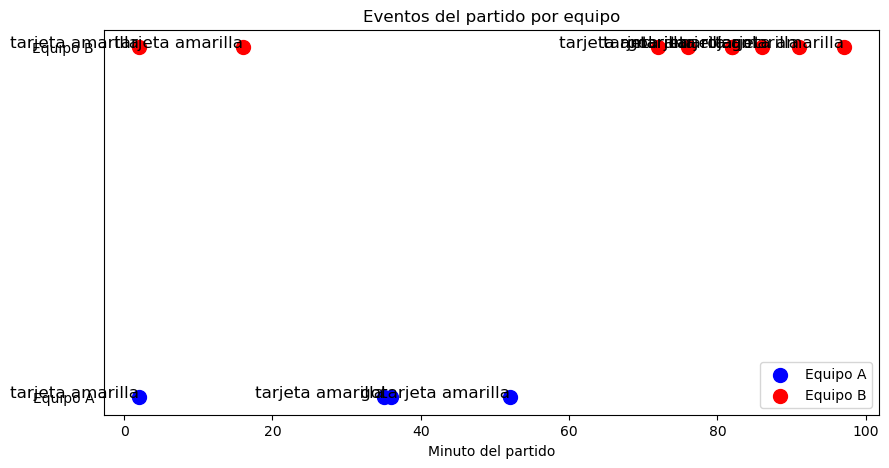

In [14]:
import matplotlib.pyplot as plt

eventos_con_tiempo = [
    {'evento': ' gol ', 'minuto': 36, 'equipo': 'Equipo A'},
    {'evento': 'tarjeta amarilla', 'minuto': 2, 'equipo': 'Equipo A'},
    {'evento': 'tarjeta amarilla', 'minuto': 35, 'equipo': 'Equipo A'},
    {'evento': 'tarjeta amarilla', 'minuto': 52, 'equipo': 'Equipo A'},
    {'evento': ' gol ', 'minuto': 72, 'equipo': 'Equipo B'},
    {'evento': ' gol ', 'minuto': 86, 'equipo': 'Equipo B'},
    {'evento': 'tarjeta amarilla', 'minuto': 2, 'equipo': 'Equipo B'},
    {'evento': 'tarjeta amarilla', 'minuto': 16, 'equipo': 'Equipo B'},
    {'evento': 'tarjeta amarilla', 'minuto': 76, 'equipo': 'Equipo B'},
    {'evento': 'tarjeta amarilla', 'minuto': 82, 'equipo': 'Equipo B'},
    {'evento': 'tarjeta roja', 'minuto': 82, 'equipo': 'Equipo B'},
    {'evento': 'tarjeta amarilla', 'minuto': 91, 'equipo': 'Equipo B'},
    {'evento': 'tarjeta amarilla', 'minuto': 97, 'equipo': 'Equipo B'},
]

# Crear listas de tiempos y eventos por equipo
tiempos_equipo_A = [evento['minuto'] for evento in eventos_con_tiempo if evento['equipo'] == 'Equipo A']
eventos_equipo_A = [evento['evento'] for evento in eventos_con_tiempo if evento['equipo'] == 'Equipo A']
tiempos_equipo_B = [evento['minuto'] for evento in eventos_con_tiempo if evento['equipo'] == 'Equipo B']
eventos_equipo_B = [evento['evento'] for evento in eventos_con_tiempo if evento['equipo'] == 'Equipo B']

# Visualizar los eventos en una línea de tiempo
plt.figure(figsize=(10, 5))
plt.scatter(tiempos_equipo_A, [1] * len(tiempos_equipo_A), label='Equipo A', color='blue', s=100)
plt.scatter(tiempos_equipo_B, [2] * len(tiempos_equipo_B), label='Equipo B', color='red', s=100)

# Añadir etiquetas de eventos
for i, evento in enumerate(eventos_equipo_A):
    plt.text(tiempos_equipo_A[i], 1, evento, fontsize=12, ha='right')
for i, evento in enumerate(eventos_equipo_B):
    plt.text(tiempos_equipo_B[i], 2, evento, fontsize=12, ha='right')

plt.yticks([1, 2], ['Equipo A', 'Equipo B'])
plt.xlabel('Minuto del partido')
plt.title('Eventos del partido por equipo')
plt.legend()
plt.show()
